<h1>Experiment I: Adding occluded areas to the images</h1><br>
...explanation should go here ...


In [3]:
import sys
sys.path.append("../../../")

In [8]:
from components.classes.Metrix import Wrapper as me
import numpy as np
from components.utils import utils as u
import imp
import cv2
import matplotlib.pyplot as plt
import imp

In [11]:
disparity_path = "../optimisation/metrix_test/bad2.0/cones_multiRBF_bad2.0_nonocc.png"
groundtruth_path = "metrix_test/gt/cones_groundtruth.png"
non_occ_path = "metrix_test/gt/cones_nonocc.png"

disparity_loaded = cv2.imread(disparity_path, cv2.IMREAD_GRAYSCALE).astype(np.float64) 
grountruth_loaded = cv2.imread(groundtruth_path, cv2.IMREAD_GRAYSCALE).astype(np.float64) 
non_occ_loaded = cv2.imread(non_occ_path, cv2.IMREAD_GRAYSCALE).astype(np.float64) 
u.plotThreeImages(disparity_loaded, grountruth_loaded, non_occ_loaded, title=["cones_multiRBF_bad2.0_nonocc.png", "cones_groundtruth.png", "cones_nonocc.png"])

AttributeError: 'NoneType' object has no attribute 'astype'

As a next step, the occlusion map should be added to the images


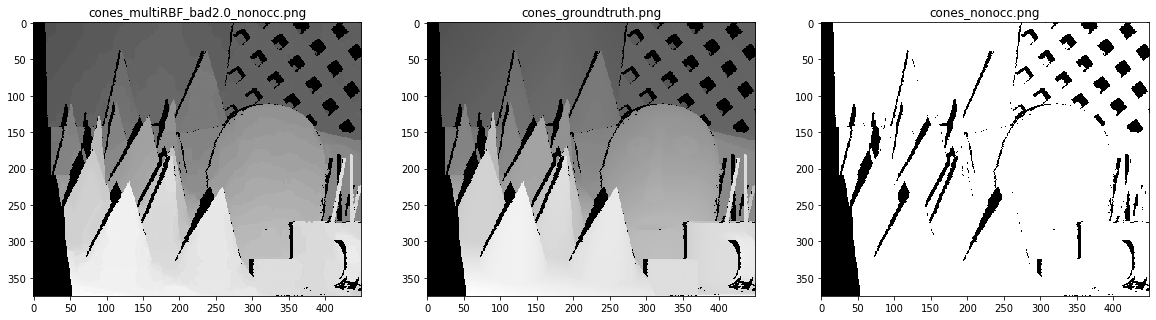

In [13]:
disparity_masked = u.add_occlusions(disparity_loaded, non_occ_loaded).astype(np.float64)
groundtruth_masked = u.add_occlusions(grountruth_loaded, non_occ_loaded).astype(np.float64)
u.plotThreeImages(disparity_masked, groundtruth_masked, non_occ_loaded, title=["cones_multiRBF_bad2.0_nonocc.png", "cones_groundtruth.png", "cones_nonocc.png"])

In [14]:
non_masked_diff = np.sum(np.abs(np.subtract(disparity_loaded, grountruth_loaded)))
masked_diff = np.sum(np.abs(np.subtract(disparity_masked,  groundtruth_masked)))
mask_unmasked_difference = np.abs(non_masked_diff-masked_diff)
print("Absolute difference between the original images: %2.2f"%(non_masked_diff))
print("Absolute difference between the masked images: %2.2f"%(masked_diff))
print("Absolute difference between the original and masked images: %2.2f"%(mask_unmasked_difference))


Absolute difference between the original images: 900823.00
Absolute difference between the masked images: 229901.00
Absolute difference between the original and masked images: 670922.00


In [15]:
print((np.abs(disparity_loaded-grountruth_loaded)))

x = me.bad(disparity_loaded, disparity_masked, threshold = 0, non_occ=True, occlusion_map = non_occ_loaded)
print(np.any(x==0))

[[ 4.  4.  4. ... 82.  0.  0.]
 [ 4.  4.  4. ...  2.  0.  0.]
 [ 4.  4.  4. ...  1.  1.  0.]
 ...
 [ 4.  4.  3. ... 13. 12. 10.]
 [ 4.  4.  4. ... 15. 15. 14.]
 [ 3.  3.  3. ... 22. 22. 21.]]
False


In [16]:
print(x)

0.17247752317162987
